# Intro to TensorFLow2 

## Whats  new? 
- Intro to TensorFlow2 data structures and operations.
### Reference 
- Based on Chapter 11 of  “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurélien Géron (O’Reilly). Copyright 2019 Kiwisoft S.A.S., 978-1-492-03264-9.”   

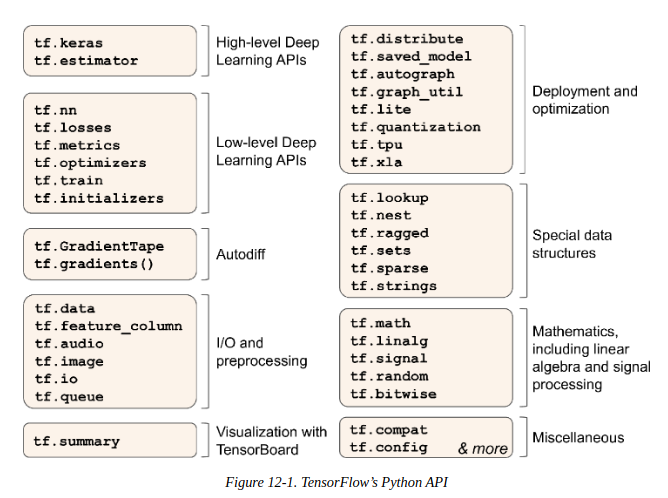

In [1]:
import tensorflow as tf


## Tensorflow is very similar to NumPy

- TensorFlow is designed around Tensors, which behaves like numpy's ndarrays (n dimensinal arrays).
- If you are not familiar with numpy yet or would like to brush up on the syntax, I would recommend going back and going over numpy syntax.


### Creating a tensor and doing operations on them.


In [8]:
#creating tensors
two_tensor = tf.constant([[1., 2, 4], [4, 5., 9]]) #2-tensor(matrix)
two_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 4.],
       [4., 5., 9.]], dtype=float32)>

In [9]:
tf.constant(18) #creating a constant 1-tensor of int

<tf.Tensor: shape=(), dtype=int32, numpy=18>

#### Similar to nd arrays, tf.constant has `shape` and `dtype` attributes.

In [10]:
print(two_tensor.shape)
print(two_tensor.dtype)

(2, 3)
<dtype: 'float32'>


#### Indexing like numpy

In [11]:
two_tensor[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 4.],
       [5., 9.]], dtype=float32)>

In [16]:
two_tensor[...,2,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[4.],
       [9.]], dtype=float32)>

#### Tensor oprators are similar to numpy

In [17]:
two_tensor + 100 # same as tf.add(two_tensor, 100)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[101., 102., 104.],
       [104., 105., 109.]], dtype=float32)>

In [23]:
#We can use tensorflow functions, tf.function like np.function functions
tf.square(two_tensor) #or two_tensor **2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4., 16.],
       [16., 25., 81.]], dtype=float32)>

In [27]:
two_tensor @ tf.transpose(two_tensor) #same as tf.matmul(two_tensor,tf.transpose(two_tensor))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 21.,  50.],
       [ 50., 122.]], dtype=float32)>

#### Other basic operattions. 

- tf.add(), tf.multiply(), tf.square(), tf.exp(), tf.sqrt().  
- Most Numpy operations lie  tf.reshape(), tf.squeeze(), tf.tile().  
- Some functions have a different name than in NumPy; for example, tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), and tf.math.log() are the equivalent of np.mean(), np.sum(), np.max() and np.log(). 
- Reason for change in name: 
    - in TensorFlow you must write tf.transpose(t) instad of  t.T like in NumPy. This is because  the tf.transpose() function does not do exactly the same thing as NumPy’s T attribute: in TensorFlow, a new tensor is created with its own copy of the transposed data, while in NumPy, t.T is just a transposed view on the same data. 
    - tf.reduce_sum() operation is named this way because its GPU kernel (i.e., GPU implementation) uses a reduce algorithm that does not guarantee the order in which the elements are added: because 32-bit floats have limited precision, the result may change ever so slightly every time you call this operation. The same is true of tf.reduce_mean() (but of course tf.reduce_max() is deterministic).

#### Using other Keras backend 

In order to guarantee portability of Keras functions to other backends, we can do the following:
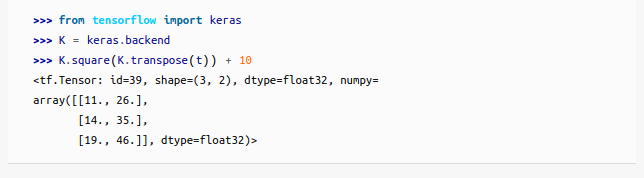

Note that if we are using tf.keras, doing K.function is same as doing tf.function.

#### Going between tensors and NumPy

In [31]:
import numpy as np
np_array = np.array([1,2,3.]) #np.array
tf.constant(np_array) #converting to tf tensor


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>

In [34]:
#converting from tesnfor to np array
two_tensor.numpy #same as np.array(two_tensor)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 4.],
       [4., 5., 9.]], dtype=float32)>>

In [38]:
type(tf.square(np_array))

tensorflow.python.framework.ops.EagerTensor

In [37]:
type(np.square(two_tensor))

numpy.ndarray

- NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit, since its faster and occupy less ram. So when you create a tensor from a NumPy array, make sure to set dtype=tf.float32

#### Type conversion is not automatic in TensorFlow

For example `tf.constant(2.) + tf.constant(40)` would throw the following error: 
InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2].  

Instead, we need to do the following:


In [48]:
tf.constant(2.) + tf.constant(40,dtype=float)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [49]:
tf.constant(2, dtype=tf.float64) + tf.constant(10, dtype=tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=12.0>

### Variables instead of constanst in tf

- tf.Tensor (tf.constant) are an immutable data type, so they cannot be used to do something like holds weights in a neural network.
- tf.Variable is immutable and can vary easily over time without changing its id. 

In [73]:
var = tf.Variable([[1,2,4.],[10,100,1000]])
var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[   1.,    2.,    4.],
       [  10.,  100., 1000.]], dtype=float32)>

- tf.Variable acts much like a tf.Tensor: you can perform the same operations with it, it plays nicely with NumPy as well, and it is just as picky with types.
- But it can also be modified in place using the assign() method (or assign_add() or assign_sub(), which increment or decrement the variable by the given value). You can also modify individual cells (or slices), by using the cell’s (or slice’s) assign() method (direct item assignment will not work) or by using the scatter_update() or scatter_nd_update() methods:

In [74]:
var.assign(10*var)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[   10.,    20.,    40.],
       [  100.,  1000., 10000.]], dtype=float32)>

In [75]:
var[1,2].assign(999)


<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  10.,   20.,   40.],
       [ 100., 1000.,  999.]], dtype=float32)>

In [78]:
var[:,2].assign([99,999])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  10.,   20.,   99.],
       [ 100., 1000.,  999.]], dtype=float32)>

In [79]:
var.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 100.,   20.,   99.],
       [ 100., 1000.,  200.]], dtype=float32)>

### Other available data structures

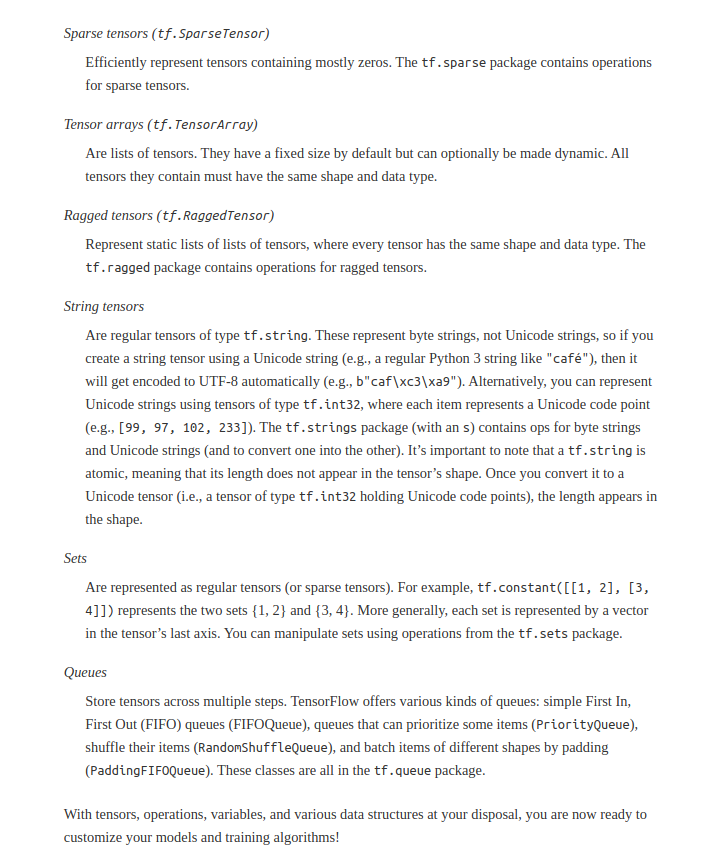